<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def getData():
    return pd.read_csv("/content/drive/MyDrive/CIENTISTA DE DADOS/MENTORAMA - AULAS/MODULO 13/dataframe_exercicio_clusterizacao_RFM.csv")

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.cluster import KMeans

In [5]:
df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [6]:
#Verificando Valores Nulos no dados
df.isnull().values.any()

False

## Pontuação de Fidelidade

Sera criado uma nova coluna chamada prontuação de fidelidade(RFM Score), ou seja, quanto mais alto a pontuação mais valioso é para a empresa.



In [8]:
# Criando os níveis de R, F e M - 5 níveis
niveis_r = range(5,0,-1)
niveis_f = range(1,6)
niveis_m = range(1,6)

# Dividindo a lista de clientes em 5 quintis (dividindo nos quartis)
r_quintis = pd.qcut(df['rec'], q=5, labels = niveis_r)
f_quintis = pd.qcut(df['freq'], q=5, labels = niveis_f)
m_quintis = pd.qcut(df['valor'], q=5,labels = niveis_m)
df = df.assign(R=r_quintis,F=f_quintis,M=m_quintis)

In [9]:
df['RFM_score'] = df[['R','F','M']].sum(axis=1).round()
df

,user,rec,freq,valor,R,F,M,RFM_score
0,1,15.0,7.0,196.881015,5,4,5,14
1,2,51.0,6.0,162.408892,3,4,4,11
2,3,80.0,5.0,180.158644,1,3,5,9
3,4,38.0,4.0,156.048130,3,2,4,9
4,5,19.0,6.0,164.052067,4,4,5,13
...,...,...,...,...,...,...,...,...
1007,1008,50.0,6.0,116.867455,3,4,3,10
1008,1009,72.0,4.0,94.807854,2,2,3,7
1009,1010,50.0,5.0,99.187523,3,3,3,9
1010,1011,81.0,2.0,66.581900,1,1,2,4


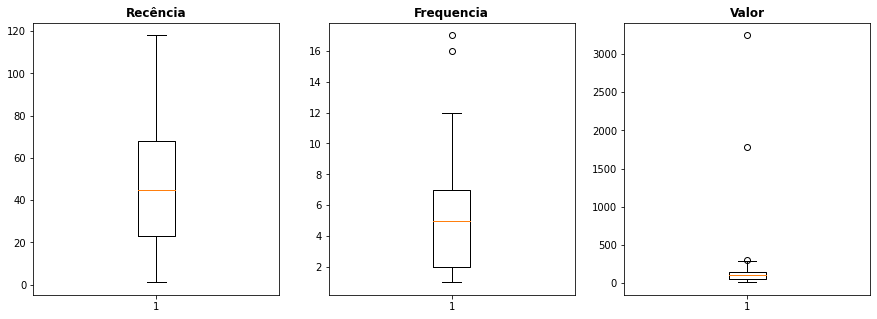

In [10]:
#Verificando Outliers
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.title("Recência", fontdict={'fontweight': 'bold'})
plt.boxplot(df.rec)
plt.subplot(1,3,2)
plt.title("Frequencia", fontdict={'fontweight': 'bold'})
plt.boxplot(df.freq)
plt.subplot(1,3,3)
plt.title("Valor", fontdict={'fontweight': 'bold'})
plt.boxplot(df.valor)
plt.show()

In [11]:
#Tratando os Outliers
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [12]:
#Criando colunas com Outliers
df['outliers_rec'] = detecta_outlier(df.rec)
df['outliers_freq'] = detecta_outlier(df.freq)
df['outliers_valor'] = detecta_outlier(df.valor)

In [13]:
#Filtrando os Outliers
dff = df.loc[(df.outliers_rec == 0) & (df.outliers_freq == 0) & (df.outliers_valor == 0)]

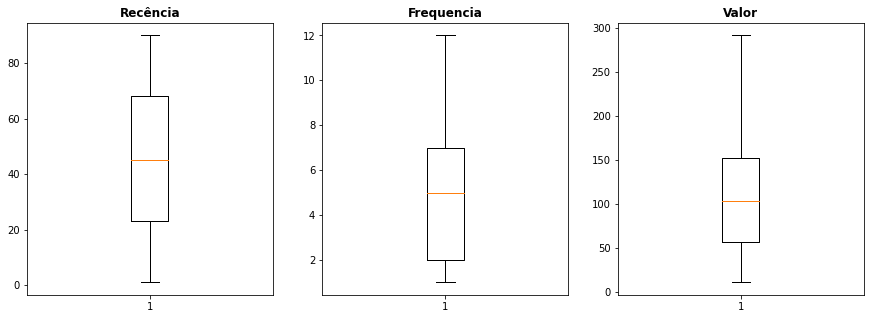

In [14]:
#Verificando sem Outliers
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.title("Recência", fontdict={'fontweight': 'bold'})
plt.boxplot(dff.rec)
plt.subplot(1,3,2)
plt.title("Frequencia", fontdict={'fontweight': 'bold'})
plt.boxplot(dff.freq)
plt.subplot(1,3,3)
plt.title("Valor", fontdict={'fontweight': 'bold'})
plt.boxplot(dff.valor)
plt.show()

In [15]:
dff

,user,rec,freq,valor,R,F,M,RFM_score,outliers_rec,outliers_freq,outliers_valor
0,1,15.0,7.0,196.881015,5,4,5,14,0,0,0
1,2,51.0,6.0,162.408892,3,4,4,11,0,0,0
2,3,80.0,5.0,180.158644,1,3,5,9,0,0,0
3,4,38.0,4.0,156.048130,3,2,4,9,0,0,0
4,5,19.0,6.0,164.052067,4,4,5,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1007,1008,50.0,6.0,116.867455,3,4,3,10,0,0,0
1008,1009,72.0,4.0,94.807854,2,2,3,7,0,0,0
1009,1010,50.0,5.0,99.187523,3,3,3,9,0,0,0
1010,1011,81.0,2.0,66.581900,1,1,2,4,0,0,0


## Avaliação I

Será avaliado as variaveis RFM_score com o valor, assim poderemos saber quais são os clientes em potencial, avaliando o seu valor pela sua pontuação de fidelidade.

In [25]:
#Variavel de estudo
X = dff[['RFM_score','valor']].copy()

In [26]:
#Normalizando as Variaveis
sc = StandardScaler()
variaveis = ['RFM_score','valor']
X = sc.fit_transform(X[variaveis])

In [27]:
X

array([[ 2.23628472,  1.66502102],
       [ 0.95822643,  1.0445791 ],
       [ 0.10618756,  1.36404565],
       ...,
       [ 0.10618756, -0.09330232],
       [-2.02390959, -0.68015031],
       [ 0.10618756,  0.44667815]])

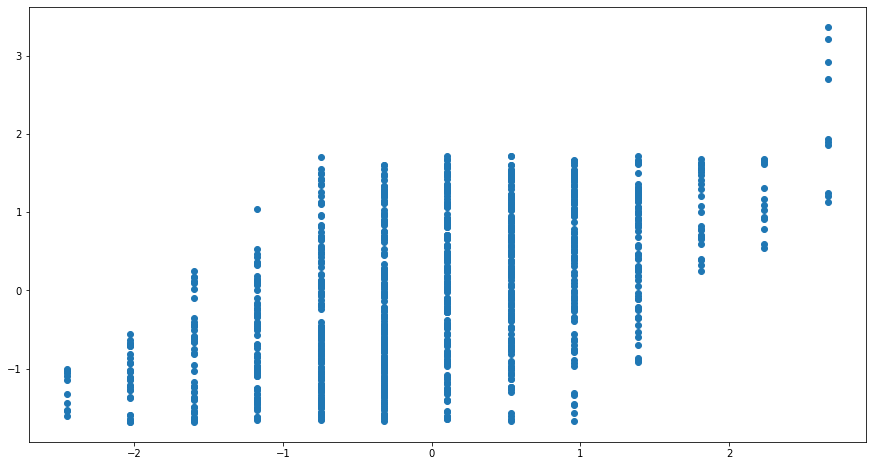

In [28]:
plt.figure(figsize=[15,8])
plt.scatter(X[:,0], X[:,1])
plt.show()

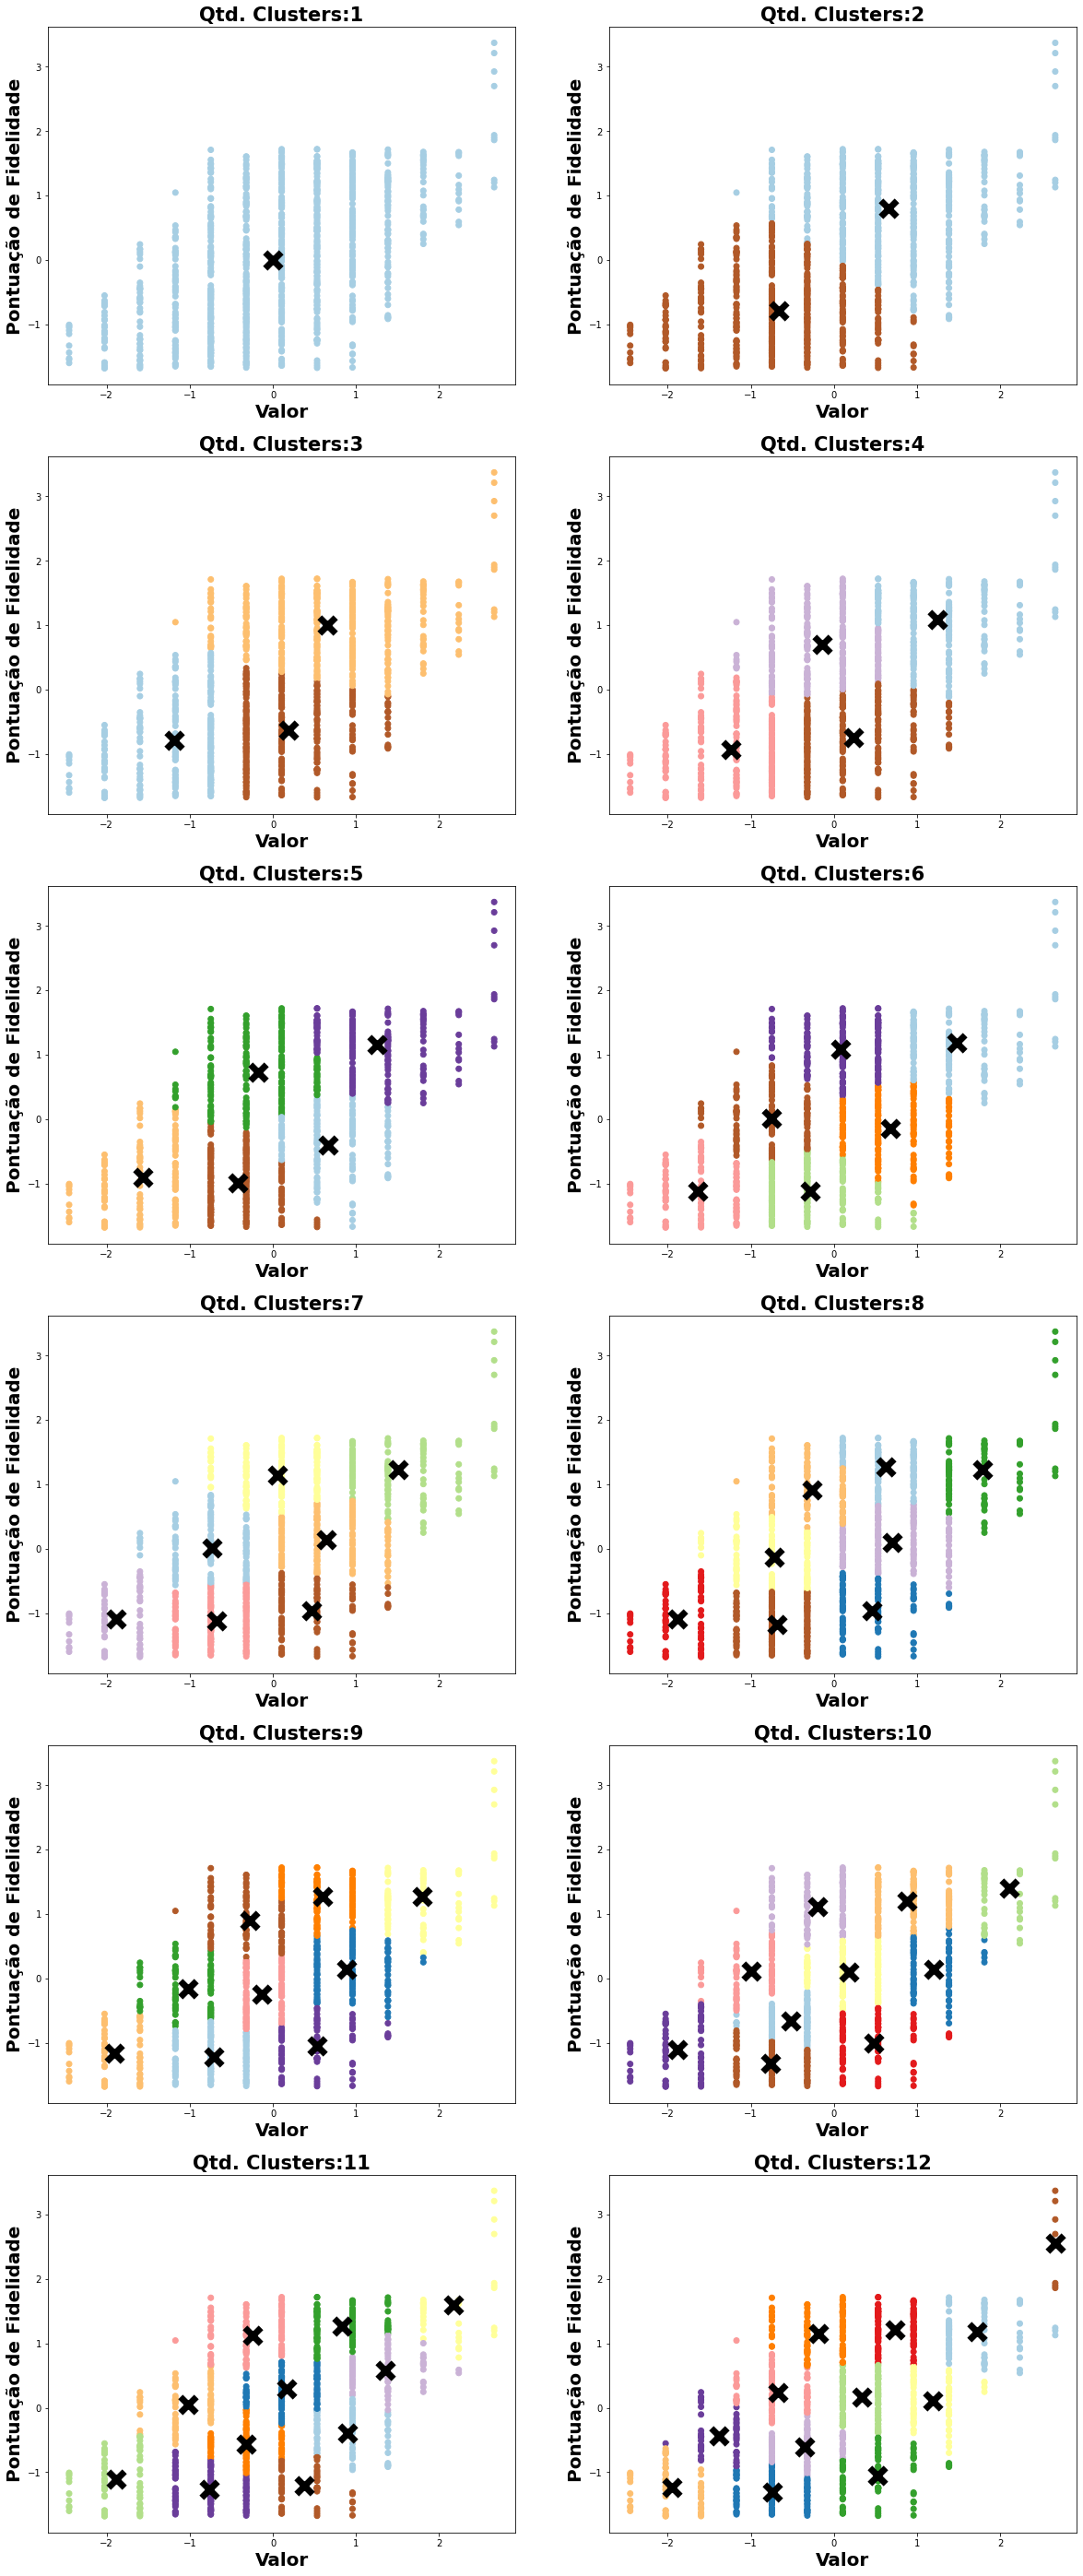

In [29]:
# Aplicando A clusterização Kmeans

plt.figure(figsize=[20,50])

for k in range(1, 13):
    km = KMeans(n_clusters=k)
    km.fit(X)
    plt.subplot(6,2,k)
    plt.xlabel("Valor", fontsize = 20, fontweight = 'bold')
    plt.ylabel("Pontuação de Fidelidade", fontsize = 20, fontweight = 'bold')
    plt.title("Qtd. Clusters:" + str(k), fontsize = 21, fontweight = 'bold')
    plt.scatter(X[:,0], X[:, 1], c = km.predict(X), cmap = plt.cm.Paired)
    for centr in km.cluster_centers_:
        plt.scatter(centr[0], centr[1], s = 300, marker = 'x', c = 'black', lw = 7)
    #plt.xticks([])
    #plt.yticks([])
plt.show()

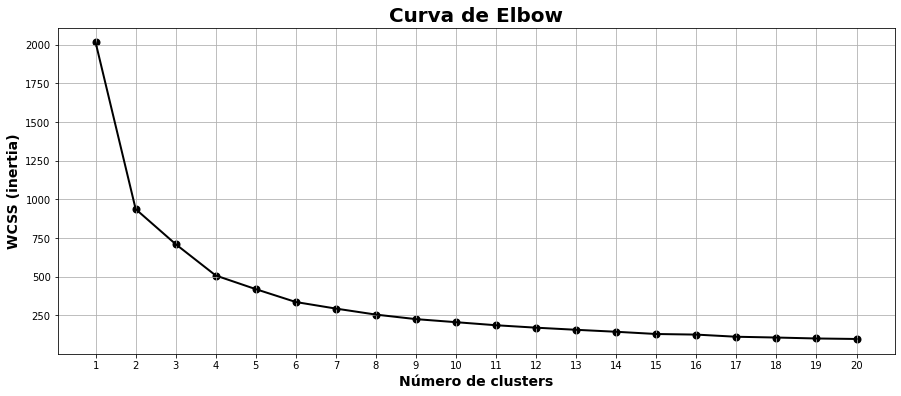

In [30]:
#Curva de Elbow

l=[]
for k in range(1, 21):
    km = KMeans(n_clusters=k)
    km.fit(X)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

## Avaliação II

Podemos Observar que a curva de elbow nos mostra que o melhor WCSS é 4

Considerando a quantidade de cluster 4, o Resultado da Avaliação Utilizando o Kmeans:

*   A Cor Azul, São os clientes de maior valor e alta/média importancia
*   A Cor Roxa, São clientes de média importancia com médio valor
*   A Cor Marrom, são clientes de baixa importancia com médio valor
*   A cor Rosa, são os clientes de baixo valor e baixa importancia





## Utilizando o DBCAN para avaliação

In [31]:
from sklearn.cluster import DBSCAN

In [47]:
db1 = DBSCAN(eps=0.4, min_samples=4).fit(X)
db1

DBSCAN(eps=0.4, min_samples=4)

In [48]:
df1 = pd.DataFrame(np.c_[X, db1.labels_], columns = ['x1', 'x2', 'label_db1'])

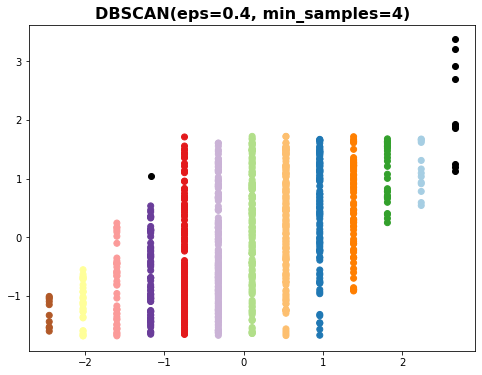

In [49]:
plt.figure(figsize=[8,6])
plt.title("DBSCAN(eps=0.4, min_samples=4)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2, 
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2, 
            c = 'black')
plt.show()

#Avaliação III

O DBSCAN Não representou bem os dados, pois um valor de eps acima de 0.4, a clusterização não é efetiva, assim não dividindo os dados em grupos.

Já valores abaixo de 0.4, são detectados anomalias nas bordas dos dados, assim removendo clientes valioso com pontuação alta e valor alto, podendo desconsiderar um cliente muito forte para empresa; em uma empresa pequena isso pode impactar na tomada de decisão.